# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD")
btc_price = btc_price.json()
btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]
btc_price
# Fetch current ETH price
eth_price = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD")
eth_price = eth_price.json()
eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

# Compute current value of my crpto
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41742.00
The current value of your 5.3 ETH is $12683.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio_year

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-01-18 00:00:00-05:00  111.81  111.86  111.47  111.49  7390142  459.73   

                                                             
                             high     low   close    volume  
time                                                         
2022-01-18 00:00:00-05:00  459.96  455.31  456.53  95565773

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio_year["AGG"]["close"]
spy_close_price = df_portfolio_year["SPY"]["close"]
agg_close_price = agg_close_price[0]
spy_close_price = spy_close_price[0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.49
Current SPY closing price: $456.53


In [10]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22826.50
The current value of your 200 AGG shares is $22298.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
assets = ['Crypto','Stocks']
# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
stock_value = my_agg_value + my_spy_value
savings = {crypto_value, stock_value}

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index=assets)


# Display savings DataFrame
display(df_savings)

,0
Crypto,54425.324
Stocks,45124.500


<AxesSubplot:title={'center':'Savings composition'}, ylabel='0'>

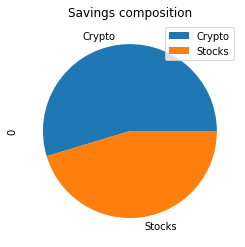

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y=0,title="Savings composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value+ stock_value

# Validate saving health
if total_savings < emergency_fund:
    delta = emergency_fund - total_savings
    print('You are $' + str(delta) + ' of your savings goal')
elif total_savings == emergency_fund:
    print("Congratulations! You've met your savings goal")
else: 
    print("Congratulations! You've surpassed your savings goal")

Congratulations! You've surpassed your savings goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-18', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887.0   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2018-01-29 00:00:00-05:00     NaN     NaN     NaN     NaN          NaN  
2018-01-30 00:00:00-05:00  282.59  283.29  281.22  281.66   86366361.0  
2018-01-31 00:00:00-05:00  282.73  283.30  280.68  281.91   76360186.0  
2018-02-01 00:00:00-05:00  281.04  283.06  280.68  281.60   64693558.0  
2018-02-02 00:00:00-05:00  280.08  280.23  275.41  275.52  121717871.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
weights=[40,60]
nSim = 500
nTrading =252*30


In [19]:
# Printing the simulation input data
simulation_data.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887.0   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-29 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-01-30 00:00:00-05:00    -0.001710  282.59  283.29  281.22  281.66   
2018-01-31 00:00:00-05:00     0.000787  282.73  283.30  280.68  281.91   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.06  280.68  281.60   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.23  275.41  275.52   

                                                     
                                volume daily_return  
time                                                 
2018-01-29 00:00:00-05:00          NaN          NaN  
2018-01-30 00:00:00-05:00   86366361.0          NaN  
2018-01-31 00:00:00-05:00   76360186.0     0.000888  
2018-02-01 00:00:00-05:00   64693558.0    -0.001100  
2018-02-02 00:00:00-05:00  121717871.0    -0.021591

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
simulation_data = MCSimulation(
    portfolio_data=df_stock_data, 
    weights="",
    num_simulation=1000,
    num_trading_days=252*30
)
simulation_data.portfolio_data.head()
simulation_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\johng\ASU-TEM-VIRT-FIN-PT-12-2021-U-C\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981412,0.998728,0.996465,1.006863,1.002819,1.008468,1.001452,0.980818,0.988947,0.998417,...,0.997216,1.010280,1.000374,0.994417,1.001385,0.995841,0.991507,0.996266,0.995038,0.996511
2,0.998292,1.003783,0.995812,0.996965,0.991684,1.009957,1.007513,0.975670,0.981985,0.990318,...,1.009409,1.016169,0.994790,1.000224,1.003367,0.996135,0.988921,1.006114,0.996453,0.986825
3,1.003308,0.989272,1.005704,0.986442,0.984261,1.006163,1.008600,0.970343,0.974556,0.986146,...,1.004136,1.020750,0.987640,1.006967,1.000723,0.995296,0.973323,1.006660,1.004653,0.988284
4,1.000634,0.991702,1.005650,0.992620,0.982922,1.005462,1.013911,0.985013,0.974754,0.981535,...,0.999009,1.018189,0.985346,1.007210,0.995755,0.997280,0.975260,1.014501,1.010247,0.986984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.515779,15.910464,7.444459,4.426043,8.774604,9.609714,12.780568,4.006160,2.493128,11.938984,...,12.528416,7.005192,5.296598,10.556548,8.322093,3.148114,18.531886,8.830975,5.533673,5.067231
7557,5.533298,15.852894,7.478943,4.471340,8.810152,9.782380,12.749106,4.025639,2.487605,11.864804,...,12.603992,7.104057,5.329816,10.682509,8.341652,3.155621,18.571193,8.847568,5.538128,5.061552
7558,5.562406,16.051970,7.596770,4.444807,8.854092,9.727612,12.886113,4.045057,2.486841,11.692239,...,12.773132,7.114998,5.281132,10.627779,8.258166,3.157671,18.624162,8.866882,5.502249,5.089896
7559,5.540124,16.327590,7.551730,4.490942,8.892621,9.760443,12.830410,4.016496,2.474056,11.814078,...,12.892435,6.999214,5.341840,10.624412,8.310342,3.182543,18.557889,8.967490,5.510611,5.075427


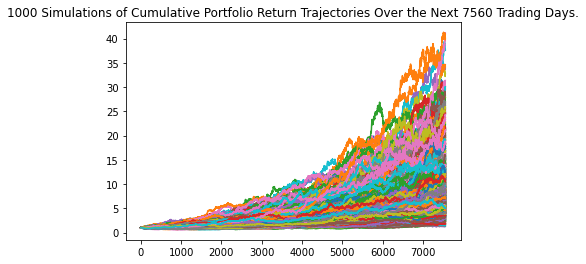

In [21]:
# Plot simulation outcomes
line_plot = simulation_data.plot_simulation()

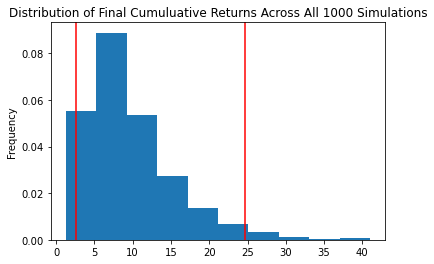

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = simulation_data.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=simulation_data.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               9.717810
std                5.810849
min                1.270385
25%                5.575810
50%                8.277335
75%               12.424267
max               41.016222
95% CI Lower       2.622987
95% CI Upper      24.729704
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $52459.74 and $494594.07


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $78689.61 and $741891.11


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
sim5years_data = MCSimulation(
    portfolio_data=df_stock_data, 
    weights="",
    num_simulation=300,
    num_trading_days=252*5
)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
sim5years_data.portfolio_data.head()
sim5years_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\johng\ASU-TEM-VIRT-FIN-PT-12-2021-U-C\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994153,1.012926,0.979084,0.989387,1.000443,0.992967,0.998473,0.994758,1.010735,0.998251,...,0.996952,1.000052,1.000453,0.999230,0.991320,1.008605,1.000481,0.985824,1.001029,0.991174
2,0.996635,1.005567,0.988980,0.987005,1.005594,0.993977,0.990804,0.988807,1.021146,0.999184,...,0.994047,0.989377,1.008970,0.995881,0.989292,1.016312,1.007252,0.988089,0.996436,0.994619
3,0.998374,0.992023,0.997473,0.986399,0.990992,0.995044,0.998141,0.986178,1.016893,0.984751,...,0.996192,0.985889,1.000228,0.995625,0.991664,1.013919,1.003085,0.991923,0.992839,0.990675
4,0.996992,0.992262,0.995450,0.993606,0.993692,0.987428,1.003278,0.993767,1.017938,0.998364,...,0.995257,0.990341,1.004151,0.997341,0.984518,1.025224,0.995666,0.995193,0.991949,0.989510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.298684,2.358682,1.148900,0.970843,1.189697,1.787334,1.262963,0.799664,1.969155,1.302685,...,1.077818,2.130859,2.231905,1.384918,1.256248,0.860908,1.698070,1.547801,1.271099,0.741003
1257,1.318890,2.345621,1.155462,0.968388,1.210899,1.784582,1.264212,0.801616,1.973027,1.297492,...,1.087645,2.129846,2.237658,1.374113,1.263500,0.867082,1.700483,1.552373,1.264982,0.741767
1258,1.311194,2.346432,1.150106,0.968440,1.210519,1.785046,1.266709,0.795946,1.980467,1.303922,...,1.076871,2.123068,2.222567,1.373473,1.266774,0.870584,1.697354,1.555882,1.265307,0.751205
1259,1.319050,2.346824,1.151474,0.972730,1.210019,1.783218,1.258716,0.803922,1.973448,1.303831,...,1.077781,2.151321,2.242193,1.377812,1.280996,0.858962,1.696783,1.561376,1.259438,0.761421


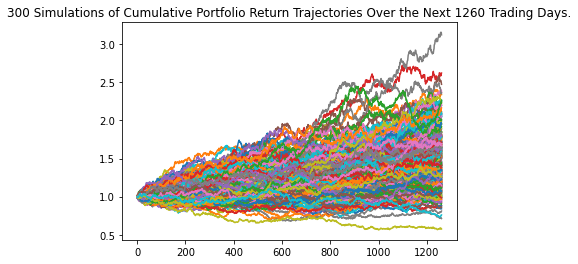

In [32]:
# Plot simulation outcomes
line_plot = sim5years_data.plot_simulation()

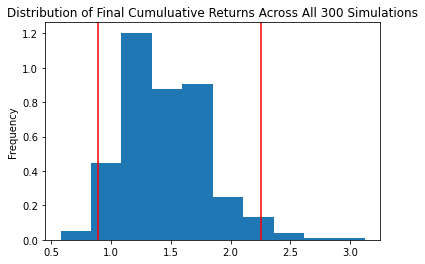

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = sim5years_data.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
data=sim5years_data.summarize_cumulative_return()

# Print summary statistics
print(data)

count           300.000000
mean              1.463383
std               0.361521
min               0.577016
25%               1.196269
50%               1.411094
75%               1.683133
max               3.123049
95% CI Lower      0.893341
95% CI Upper      2.258209
Name: 1260, dtype: float64


In [36]:
# Set initial investment
initial_investment=50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $131149.36 and $1236485.18


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
sim10years_data = MCSimulation(
    portfolio_data=df_stock_data, 
    weights="",
    num_simulation=300,
    num_trading_days=252*10
)
sim10years_data.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887.0   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870.0   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-29 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-01-30 00:00:00-05:00    -0.001710  282.59  283.29  281.22  281.66   
2018-01-31 00:00:00-05:00     0.000787  282.73  283.30  280.68  281.91   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.06  280.68  281.60   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.23  275.41  275.52   

                                                     
                                volume daily_return  
time                                                 
2018-01-29 00:00:00-05:00          NaN          NaN  
2018-01-30 00:00:00-05:00   86366361.0          NaN  
2018-01-31 00:00:00-05:00   76360186.0     0.000888  
2018-02-01 00:00:00-05:00   64693558.0    -0.001100  
2018-02-02 00:00:00-05:00  121717871.0    -0.021591

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
sim10years_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\johng\ASU-TEM-VIRT-FIN-PT-12-2021-U-C\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993427,1.001056,0.992362,0.995729,0.990827,1.008368,1.001201,0.996063,1.011656,0.992273,...,0.987385,1.000390,1.000514,0.990452,0.991170,0.996609,1.016281,0.993533,0.992354,1.001470
2,0.982082,0.989631,0.978860,1.005928,0.996998,1.000199,1.005273,0.997012,1.018499,0.980825,...,0.992518,1.007729,0.999598,0.992065,0.992621,0.999125,1.020476,0.999399,0.999484,1.007039
3,0.989349,1.000088,0.978770,1.012683,0.999181,0.993478,0.989037,1.002114,1.017825,0.986925,...,0.988691,1.002782,0.991141,0.994132,1.004847,0.992143,1.022840,1.007047,1.005117,1.008477
4,0.991442,1.014056,0.970345,1.015938,0.991188,0.981651,0.993368,0.998195,1.011050,0.983247,...,1.000179,0.990394,0.989192,0.999394,0.993892,0.996888,1.020479,1.013077,0.998477,1.007567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.895749,2.285559,2.239723,2.035009,1.313264,1.835230,2.256422,2.122401,2.940752,2.114025,...,1.233498,3.253870,2.286908,1.119466,2.051172,2.032542,1.804536,2.111180,2.985823,1.177586
2517,0.902164,2.276147,2.251646,2.042478,1.317191,1.835555,2.238404,2.144824,2.958941,2.124180,...,1.238636,3.211448,2.277022,1.122016,2.045722,2.026892,1.799230,2.114180,2.972108,1.195353
2518,0.902167,2.289346,2.242441,2.029299,1.307564,1.816364,2.235729,2.156746,2.945791,2.124460,...,1.235878,3.220650,2.246792,1.135389,2.037829,2.027993,1.802887,2.118353,2.959699,1.201870
2519,0.890413,2.315558,2.200833,2.052280,1.308543,1.848603,2.255535,2.143396,2.898461,2.131178,...,1.224760,3.229206,2.267429,1.129965,2.049741,2.024626,1.799052,2.152373,2.966243,1.194480


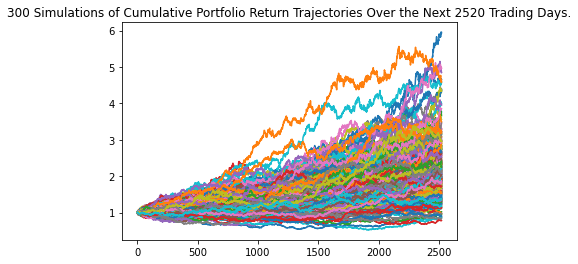

In [40]:
# Plot simulation outcomes
line_plot = sim10years_data.plot_simulation()

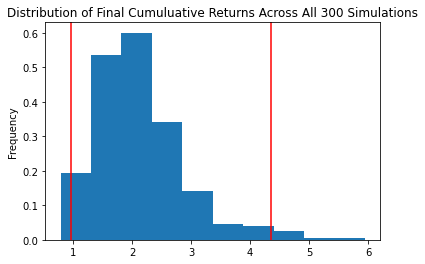

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = sim10years_data.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
data10=sim10years_data.summarize_cumulative_return()

# Print summary statistics
print(data10)

count           300.000000
mean              2.128654
std               0.789943
min               0.784566
25%               1.560045
50%               1.994710
75%               2.444529
max               5.948133
95% CI Lower      0.969165
95% CI Upper      4.360591
Name: 2520, dtype: float64


In [45]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(data10[8]*10000,2)
ci_upper_ten = round(data10[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $9691.65 and $43605.91
